In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
 

In [63]:
df = pd.read_csv (r'Real estate.csv')
df


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### 1. Linear regression from scratch for K-Fold 

In [64]:
def model(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 


    for i in range(epochs):
        y_pred = np.dot(X, theta)
        del_theta = (1/Y.size)*np.dot(X.T, y_pred - Y)   # d_theta for gradient descent (Reference)
        theta = theta - learning_rate*del_theta   # Lecture-3 , 11th Slide (Reference)

    return theta   ## Returning the final value of theta after all the epochs


epochs = 100000
learning_rate = 0.0000003

def check_error(X_test , Y_test , theta):
    
    y_pred = np.dot(X_test, theta)

    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)


# We are using del_theta by differentiating theta and then changing it according to gradient descent and then using the learning rate, and then using the theta; we finally got after all the epochs.
# Then we computer RMSE and print it.



#### 2-Fold Validation

In [65]:
fold2_1 = df.loc[0:206]         ######## # 2-Fold validation using indexing                                    
fold2_2 = df.loc[207:413]  


train_val2_1 = fold2_1
test_val2_1 = fold2_2

train_val2_2 = fold2_2
test_val2_2 = fold2_1

In [66]:
## Creating the data folds
Xtrain_2_1 = train_val2_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_2_1 =  train_val2_1[['Y house price of unit area']]

Xtest_2_1  = test_val2_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_2_1  = test_val2_1[['Y house price of unit area']]

Xtrain_2_1 = Xtrain_2_1.values
ytrain_2_1 = ytrain_2_1.values
Xtest_2_1 = Xtest_2_1.values
ytest_2_1 = ytest_2_1.values

###############
Xtrain_2_2 = train_val2_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_2_2 =  train_val2_2[['Y house price of unit area']]

Xtest_2_2  = test_val2_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_2_2  = test_val2_2[['Y house price of unit area']]

Xtrain_2_2 = Xtrain_2_2.values
ytrain_2_2 = ytrain_2_2.values
Xtest_2_2 = Xtest_2_2.values
ytest_2_2 = ytest_2_2.values
error_2 = 0

In [67]:
theta = model(Xtrain_2_2, ytrain_2_2,  learning_rate, epochs)   ##Finding the error
error_2 = error_2 +check_error(Xtest_2_2 , ytest_2_2 ,  theta)

RMSE Error (validation loss) is 
8.532699964334336


In [68]:
theta = model(Xtrain_2_1, ytrain_2_1,  learning_rate, epochs)
error_2 = error_2 +check_error(Xtest_2_1 , ytest_2_1 ,  theta)

RMSE Error (validation loss) is 
10.053264512127068


In [69]:
print("The MEAN RMSE error for K-fold when K is 2 is "+str(error_2/2)+"%")


The MEAN RMSE error for K-fold when K is 2 is 9.292982238230703%


#### 3-Fold Validation

In [70]:
fold3_1 = df.loc[0:137]         ######## # 3-Fold validation                                     
fold3_2 = df.loc[138:275]  
fold3_3 = df.loc[276:413]

train_val3_1 = pd.concat([fold3_1, fold3_2])   
test_val3_1 = fold3_3

train_val3_2 = pd.concat([fold3_1,  fold3_3])
test_val3_2 = fold3_2

train_val3_3 = pd.concat([ fold3_2, fold3_2])
test_val3_3 = fold3_1

In [71]:
Xtrain_3_1 = train_val3_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_1 =  train_val3_1[['Y house price of unit area']]

Xtest_3_1  = test_val3_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_1  = test_val3_1[['Y house price of unit area']]

Xtrain_3_1 = Xtrain_3_1.values
ytrain_3_1 = ytrain_3_1.values
Xtest_3_1 = Xtest_3_1.values
ytest_3_1 = ytest_3_1.values
###############
Xtrain_3_2 = train_val3_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_2 =  train_val3_2[['Y house price of unit area']]

Xtest_3_2  = test_val3_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_2  = test_val3_2[['Y house price of unit area']]

Xtrain_3_2 = Xtrain_3_2.values
ytrain_3_2 = ytrain_3_2.values
Xtest_3_2 = Xtest_3_2.values
ytest_3_2 = ytest_3_2.values
###############
Xtrain_3_3 = train_val3_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_3_3 =  train_val3_3[['Y house price of unit area']]

Xtest_3_3  = test_val3_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_3_3  = test_val3_3[['Y house price of unit area']]

Xtrain_3_3 = Xtrain_3_3.values
ytrain_3_3 = ytrain_3_3.values
Xtest_3_3 = Xtest_3_3.values
ytest_3_3 = ytest_3_3.values

error_3 = 0

In [72]:
theta = model(Xtrain_3_1, ytrain_3_1,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_1 , ytest_3_1 ,  theta)

RMSE Error (validation loss) is 
8.375146601613574


In [73]:
theta = model(Xtrain_3_2, ytrain_3_2,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_2 , ytest_3_2 ,  theta)

RMSE Error (validation loss) is 
10.485648986940063


In [74]:
theta = model(Xtrain_3_3, ytrain_3_3,  learning_rate, epochs)
error_3 = error_3 +check_error(Xtest_3_3 , ytest_3_3 ,  theta)

RMSE Error (validation loss) is 
8.875109098968306


In [75]:
print("The MEAN RMSE error for K-fold when K is 3 is "+str(error_3/3)+"%")


The MEAN RMSE error for K-fold when K is 3 is 9.245301562507313%


#### 4-Fold Validation

In [76]:
fold4_1 = df.loc[0:103]         ######## # 4-Fold validation                                     
fold4_2 = df.loc[104:207]  
fold4_3 = df.loc[208:311]
fold4_4 = df.loc[312:413]

train_val4_1 = pd.concat([fold4_4, fold4_2, fold4_3])   
test_val4_1 = fold4_1

train_val4_2 = pd.concat([fold4_1, fold4_2, fold4_3])   
test_val4_2 = fold4_3

train_val4_3 = pd.concat([fold4_1, fold4_2, fold4_4])
test_val4_3 = fold4_4

train_val4_4 = pd.concat([fold4_1, fold4_3, fold4_4])
test_val4_4 = fold4_2



In [77]:

Xtrain_4_1 = train_val4_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_1 =  train_val4_1[['Y house price of unit area']]

Xtest_4_1  = test_val4_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_1  = test_val4_1[['Y house price of unit area']]

Xtrain_4_1 = Xtrain_4_1.values
ytrain_4_1 = ytrain_4_1.values
Xtest_4_1 = Xtest_4_1.values
ytest_4_1 = ytest_4_1.values
###############
Xtrain_4_2 = train_val4_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_2 =  train_val4_2[['Y house price of unit area']]

Xtest_4_2  = test_val4_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_2  = test_val4_2[['Y house price of unit area']]

Xtrain_4_2 = Xtrain_4_2.values
ytrain_4_2 = ytrain_4_2.values
Xtest_4_2 = Xtest_4_2.values
ytest_4_2 = ytest_4_2.values
###############
Xtrain_4_3 = train_val4_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_3 =  train_val4_3[['Y house price of unit area']]

Xtest_4_3  = test_val4_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_3  = test_val4_3[['Y house price of unit area']]

Xtrain_4_3 = Xtrain_4_3.values
ytrain_4_3 = ytrain_4_3.values
Xtest_4_3 = Xtest_4_3.values
ytest_4_3 = ytest_4_3.values
######################

Xtrain_4_4 = train_val4_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_4_4 =  train_val4_4[['Y house price of unit area']]

Xtest_4_4  = test_val4_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_4_4  = test_val4_4[['Y house price of unit area']]

Xtrain_4_4 = Xtrain_4_4.values
ytrain_4_4 = ytrain_4_4.values
Xtest_4_4 = Xtest_4_4.values
ytest_4_4 = ytest_4_4.values
error_4 = 0



In [78]:
theta = model(Xtrain_4_4, ytrain_4_4,  learning_rate, epochs)
error_4 = error_4 + check_error(Xtest_4_4 , ytest_4_4 ,  theta)

RMSE Error (validation loss) is 
8.989943145321277


In [79]:

theta = model(Xtrain_4_2, ytrain_4_2,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_2 , ytest_4_2 ,  theta)


RMSE Error (validation loss) is 
11.373666976503163


In [80]:
theta = model(Xtrain_4_3, ytrain_4_3,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_3 , ytest_4_3 ,  theta)

RMSE Error (validation loss) is 
8.414829010762768


In [81]:
theta = model(Xtrain_4_1, ytrain_4_1,  learning_rate, epochs)
error_4 = error_4 +check_error(Xtest_4_1 , ytest_4_1 ,  theta)

RMSE Error (validation loss) is 
7.865525687422206


In [82]:
print("The MEAN RMSE error for K-fold when K is 4 is "+str(error_4/4)+"%")


The MEAN RMSE error for K-fold when K is 4 is 9.160991205002354%


#### 5-Fold Validation

In [83]:
fold5_1 = df.loc[0:82]         ######## # 5-Fold validation                                     
fold5_2 = df.loc[83:164]  
fold5_3 = df.loc[165:247]
fold5_4 = df.loc[248:329]
fold5_5 = df.loc[330:413]


train_val5_1 = pd.concat([fold5_1, fold5_2, fold5_3 , fold5_4])   
test_val5_1 = fold5_5

train_val5_2 = pd.concat([fold5_1, fold5_2, fold5_3 , fold5_5])   
test_val5_2 = fold5_4

train_val5_3 = pd.concat([fold5_1, fold5_2, fold5_4 , fold5_5])   
test_val5_3 = fold5_3

train_val5_4 = pd.concat([fold5_1, fold5_3, fold5_4 , fold5_5])   
test_val5_4 = fold5_2

train_val5_5 = pd.concat([fold5_2, fold5_3, fold5_4 , fold5_5])   
test_val5_5 = fold5_1

In [84]:

Xtrain_5_1 = train_val5_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_1 =  train_val5_1[['Y house price of unit area']]

Xtest_5_1  = test_val5_1[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_1  = test_val5_1[['Y house price of unit area']]

Xtrain_5_1 = Xtrain_5_1.values
ytrain_5_1 = ytrain_5_1.values
Xtest_5_1 = Xtest_5_1.values
ytest_5_1 = ytest_5_1.values
###############
Xtrain_5_2 = train_val5_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_2 =  train_val5_2[['Y house price of unit area']]

Xtest_5_2  = test_val5_2[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_2  = test_val5_2[['Y house price of unit area']]

Xtrain_5_2 = Xtrain_5_2.values
ytrain_5_2 = ytrain_5_2.values
Xtest_5_2 = Xtest_5_2.values
ytest_5_2 = ytest_5_2.values
###############
Xtrain_5_3 = train_val5_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_3 =  train_val5_3[['Y house price of unit area']]

Xtest_5_3  = test_val5_3[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_3  = test_val5_3[['Y house price of unit area']]

Xtrain_5_3 = Xtrain_5_3.values
ytrain_5_3 = ytrain_5_3.values
Xtest_5_3 = Xtest_5_3.values
ytest_5_3 = ytest_5_3.values
######################

Xtrain_5_4 = train_val5_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_4 =  train_val5_4[['Y house price of unit area']]

Xtest_5_4  = test_val5_4[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_4  = test_val5_4[['Y house price of unit area']]

Xtrain_5_4 = Xtrain_5_4.values
ytrain_5_4 = ytrain_5_4.values
Xtest_5_4 = Xtest_5_4.values
ytest_5_4 = ytest_5_4.values
########################

Xtrain_5_5 = train_val5_5[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytrain_5_5 =  train_val5_5[['Y house price of unit area']]

Xtest_5_5  = test_val5_5[['X1 transaction date', 'X2 house age' ,'X3 distance to the nearest MRT station' , 'X4 number of convenience stores' ,'X5 latitude' , 'X6 longitude'  ]]
ytest_5_5  = test_val5_5[['Y house price of unit area']]

Xtrain_5_5 = Xtrain_5_5.values
ytrain_5_5 = ytrain_5_5.values
Xtest_5_5 = Xtest_5_5.values
ytest_5_5 = ytest_5_5.values

error_5 = 0

In [85]:
theta = model(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_1 , ytest_5_1 ,  theta)

RMSE Error (validation loss) is 
7.99502559440744


In [86]:
theta = model(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_2 , ytest_5_2 ,  theta)

RMSE Error (validation loss) is 
12.133008492868223


In [87]:
theta = model(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_3 , ytest_5_3 ,  theta)

RMSE Error (validation loss) is 
8.019076440891384


In [88]:
theta = model(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_4 , ytest_5_4 ,  theta)

RMSE Error (validation loss) is 
9.571154949947632


In [89]:
theta = model(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5 = error_5 +check_error(Xtest_5_5 , ytest_5_5 ,  theta)

RMSE Error (validation loss) is 
7.882852238542636


In [90]:
print("The MEAN RMSE error for K-fold when K is 5 is "+str(error_5/5)+"%")


The MEAN RMSE error for K-fold when K is 5 is 9.120223543331463%


In [91]:
print("The MEAN RMSE error for K-fold when K is 2 is "+str(error_2/2))
print("The MEAN RMSE error for K-fold when K is 3 is "+str(error_3/3))
print("The MEAN RMSE error for K-fold when K is 4 is "+str(error_4/4))
print("The MEAN RMSE error for K-fold when K is 5 is "+str(error_5/5))


The MEAN RMSE error for K-fold when K is 2 is 9.292982238230703
The MEAN RMSE error for K-fold when K is 3 is 9.245301562507313
The MEAN RMSE error for K-fold when K is 4 is 9.160991205002354
The MEAN RMSE error for K-fold when K is 5 is 9.120223543331463


#### The K-Fold Values for K = 3 ,4 ,5 are similiar, we will take k = 5 as it has lowest RMSE

### 2. Plotting the RMSE V/s iteration graph for all models trained with K = 5

In [92]:
def plotrvi(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 
    cost_list = [] 
    rmse_list = []
    m = Y.size
    err_lst = []
    

    for i in range(epochs):
        y_pred = np.dot(X, theta)
        del_theta = (1/Y.size)*np.dot(X.T, y_pred - Y)   # d_theta for gradient descent
        theta = theta - learning_rate*del_theta   # Lecture-3 , 11th Slide
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))  # Lecture-4 , 14th Slide
        cost_list.append(cost)
        err = ((np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5)
        err_lst.append(err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst)

    ax2.plot(rng[100:] , err_lst[100:] )


    ax1.set_title("RMSE vs. iteration");  ax2.set_title("RMSE vs. iteration (tail)")  ## for plotting the curve
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()
epochs = 100000
learning_rate = 0.0000003

The Graph will be plotted on the train value set

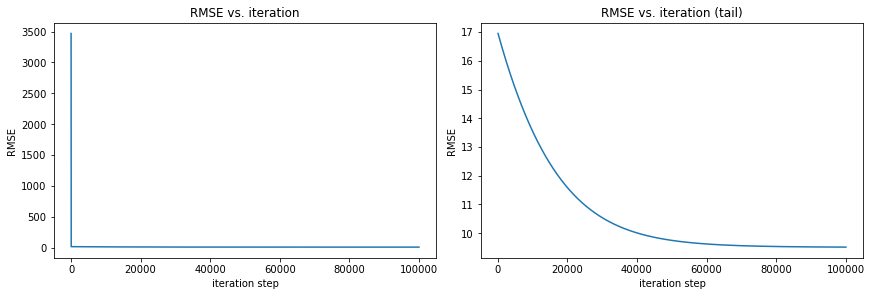

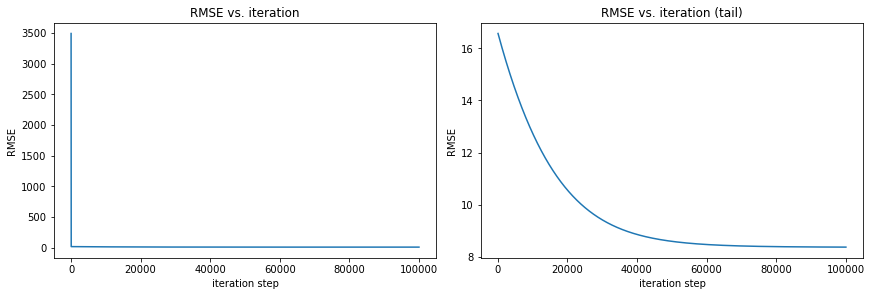

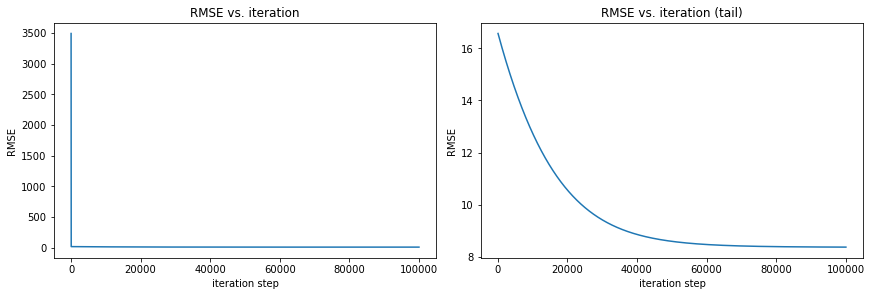

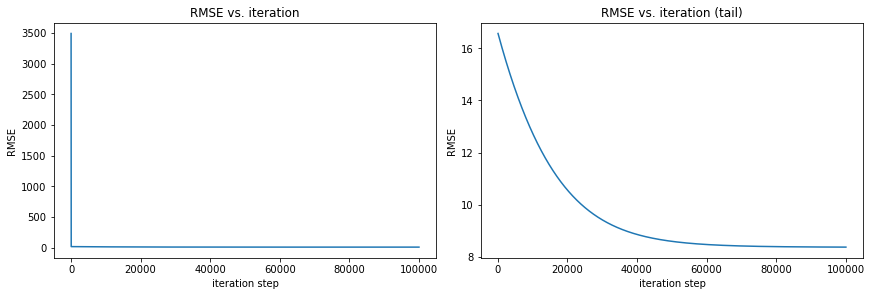

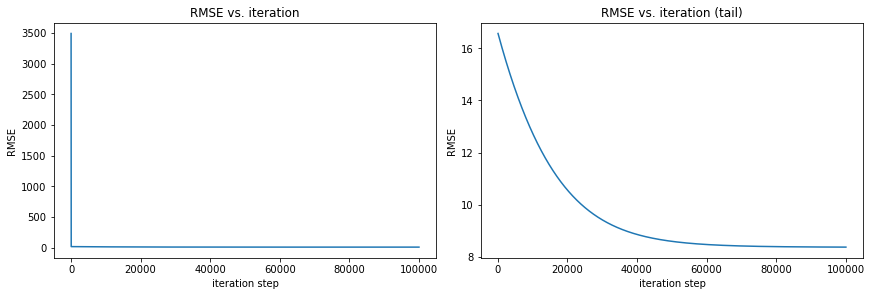

In [93]:
theta = plotrvi(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
theta = plotrvi(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)


### C. Modify Regression implementation by including L1 (LASSO) and L2 (Ridge Regression) regularization.

##### Lasso Regularization L1 Loss

In [94]:
def Lasso(X, Y, learning_rate, epochs):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.00005

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (alpha))  /X.shape[0]  # Lecture-6 Slide 20 (Reference)
        W -= learning_rate*LW

    return W

epochs = 100000
learning_rate = 0.00000003

def check_errorl1(X_test , Y_test , theta ):
    
    y_pred = np.dot(X_test, theta)


    print("Training Error is ")
    print( (np.sum(((abs(Y_test - y_pred))))/Y_test.shape[0]) )
   
    
    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5_0 = 0


# Here we are changing the theta (W) using the parameters according to the Lasso regularisation and then changing it using the learning rate,
#  and then finally using it after running all the epochs. Then we calculate the training and the validation error.


In [95]:
W = Lasso(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_1 , ytest_5_1 , W )

Training Error is 
6.204479328684476
RMSE Error (validation loss) is 
8.463902827872234


In [96]:
W = Lasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_2 , ytest_5_2 , W )

Training Error is 
8.124154742861855
RMSE Error (validation loss) is 
12.528291162682908


In [97]:
W = Lasso(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_3 , ytest_5_3 , W )

Training Error is 
6.265300323093634
RMSE Error (validation loss) is 
8.812506829262606


In [98]:
W = Lasso(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_4 , ytest_5_4 , W )

Training Error is 
7.250823920693365
RMSE Error (validation loss) is 
9.90730258761917


In [99]:
W = Lasso(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5_0 = error_5_0 +check_errorl1(Xtest_5_5 , ytest_5_5 , W )

Training Error is 
6.6820729319740595
RMSE Error (validation loss) is 
8.56121690121462


In [100]:
print("The RMSE error for Lasso Regularization when K is 5 is "+str(error_5_0/5))


The RMSE error for Lasso Regularization when K is 5 is 9.654644061730309


##### The RMSE is coming 9.654644061943909 for Lasso regularization

In [101]:
epochs = 100000
learning_rate = 0.00000003

def PlotLasso(X, Y, learning_rate, epochs , X_test , Y_test):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.000005
    err_lst=[]
    train_err_lst=[]
    # print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (alpha))  /X.shape[0]  # Lecture-6 Slide 20 (Reference)
        W -= learning_rate*LW
        y_pred = np.dot(X, W)
        err = (np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5   ## val loss
        train_err = (np.sum(((abs(Y - y_pred))))/Y.shape[0])
        err_lst.append(err)    ## adding the error to the list
        train_err_lst.append(train_err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst, label = "Validation Error")
    ax1.plot(rng , train_err_lst , label = "Training Error")

    ax2.plot(rng[100:] , err_lst[100:] , label = "Validation Error" )
    ax2.plot(rng[100:] , train_err_lst[100:] , label = "Training Error")

    ax1.set_title("Error vs. iteration");  ax2.set_title("Error vs. iteration (tail)")
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()

    # return W
    theta = W

    y_pred = np.dot(X_test, theta)

    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    



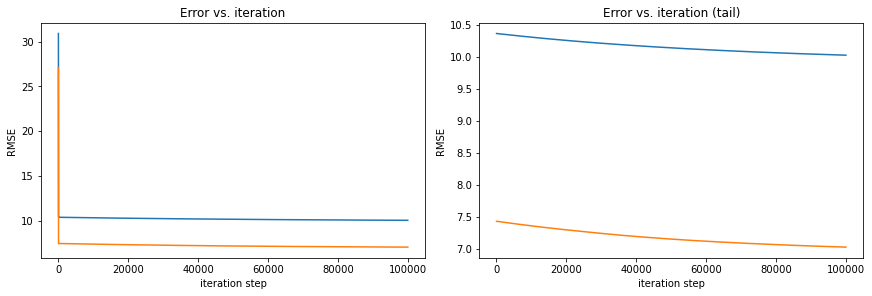

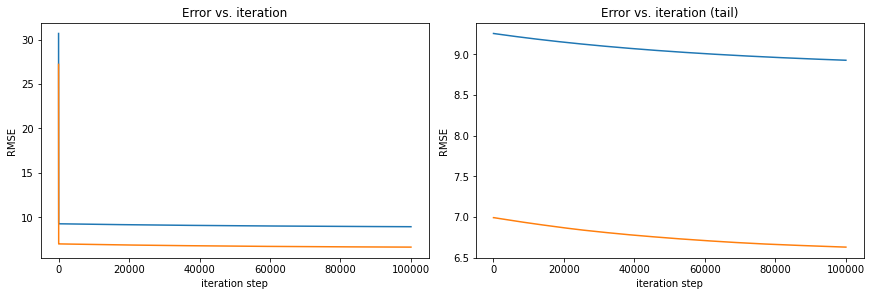

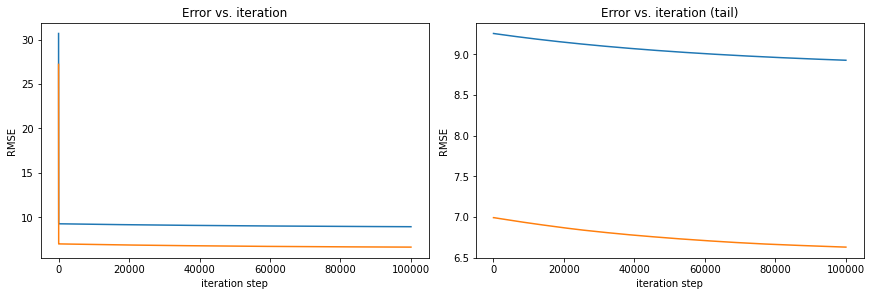

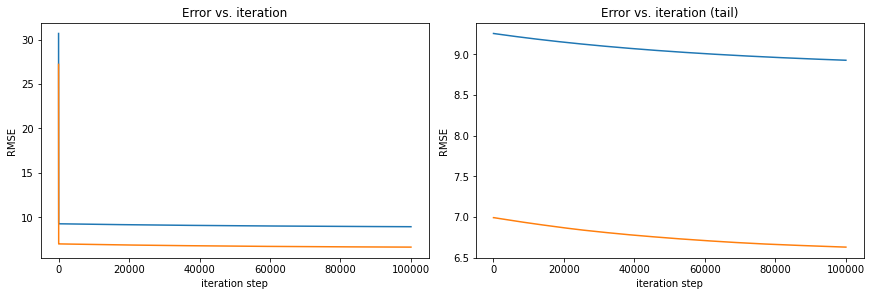

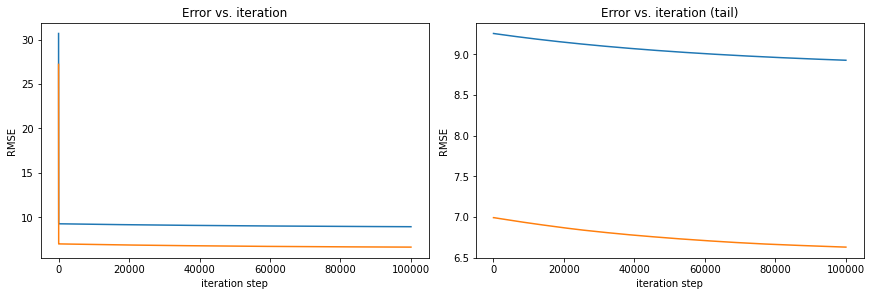

In [102]:
theta = PlotLasso(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs , Xtest_5_1 , ytest_5_1)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_2 , ytest_5_2)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_3 , ytest_5_3)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_4 , ytest_5_4)
theta = PlotLasso(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_5 , ytest_5_5)


#### Ridge Regularization L2 Loss

In [103]:
def Ridge(X, Y, learning_rate, epochs):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.00005
    print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (2*alpha*W))  /X.shape[0]  # Lecture-6 Slide 13
        W -= learning_rate*LW

    return W

epochs = 100000
learning_rate = 0.00000003

def check_errorl2(X_test , Y_test , theta ):
    
    y_pred = np.dot(X_test, theta)


    print("Training Error is ")
    print( (np.sum(((abs(Y_test - y_pred))))/Y_test.shape[0]) )
   
    
    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5 = 0


# Here we are changing the theta (W) using the parameters according to the Ridge regression and then changing it using the learning rate,
# and then finally using it after running all the epochs. Then we calculate the training and the validation error.


In [104]:
W = Ridge(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_1 , ytest_5_1 , W )

(6, 1)
Training Error is 
6.204479328828235
RMSE Error (validation loss) is 
8.4639028276228


In [105]:
W = Ridge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_2 , ytest_5_2 , W )

(6, 1)
Training Error is 
8.124154743045583
RMSE Error (validation loss) is 
12.528291162841025


In [106]:
W = Ridge(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_3 , ytest_5_3 , W )

(6, 1)
Training Error is 
6.2653003231372475
RMSE Error (validation loss) is 
8.812506829278151


In [107]:
W = Ridge(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_4 , ytest_5_4 , W )

(6, 1)
Training Error is 
7.250823921349585
RMSE Error (validation loss) is 
9.907302587889326


In [108]:
W = Ridge(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5 = error_5 +check_errorl2(Xtest_5_5 , ytest_5_5 , W )

(6, 1)
Training Error is 
6.682072932762071
RMSE Error (validation loss) is 
8.561216902088251


In [109]:
print("The RMSE error for Ridge Regularization when K is 5 is "+str(error_5/5))


The RMSE error for Ridge Regularization when K is 5 is 9.654644061943909


#### The RMSE is coming 9.654644061943909 for Ridge regularization

In [110]:
epochs = 100000
learning_rate = 0.00000003

def PlotRidge(X, Y, learning_rate, epochs , X_test , Y_test):
    
    W = np.zeros((X.shape[1], 1)) 
    b= 3
    alpha = 0.000005
    err_lst=[]
    train_err_lst=[]
    # print(W.shape)

    for i in range(epochs):
        y_pred = np.dot(X, W)  
        LW = (-(2*(X.T).dot(Y - y_pred)) + (2*alpha*W))  /X.shape[0]  # Lecture-6 Slide 13 (Reference) 
        W -= learning_rate*LW
        y_pred = np.dot(X, W)
        err = (np.sum(((abs(Y - y_pred))**2))/Y.shape[0])**0.5   ## val loss
        train_err = (np.sum(((abs(Y - y_pred))))/Y.shape[0])    
        err_lst.append(err)     ## adding the error to the lost
        train_err_lst.append(train_err)

    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

    rng = np.arange(0, epochs)  #RMSE graph
    ax1.plot(rng, err_lst, label = "Validation Error")
    ax1.plot(rng , train_err_lst , label = "Training Error")

    ax2.plot(rng[100:] , err_lst[100:] , label = "Validation Error" )
    ax2.plot(rng[100:] , train_err_lst[100:] , label = "Training Error")

    ax1.set_title("Error vs. iteration");  ax2.set_title("Error vs. iteration (tail)")
    ax1.set_ylabel('RMSE')             ;  ax2.set_ylabel('RMSE') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()

    # return W
    theta = W

    y_pred = np.dot(X_test, theta)

    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    

error_5 = 0


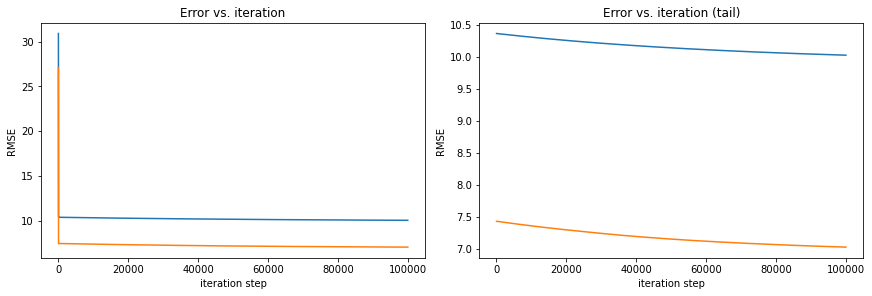

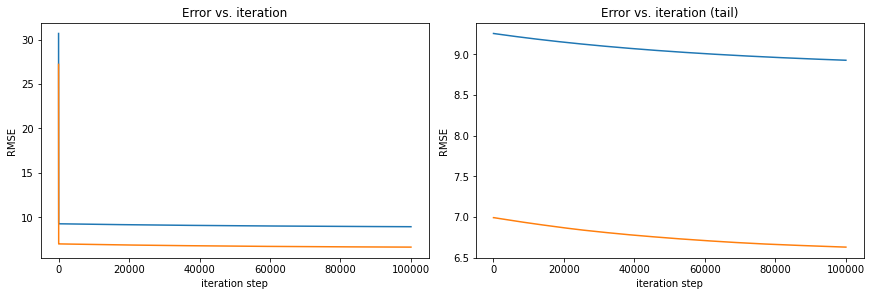

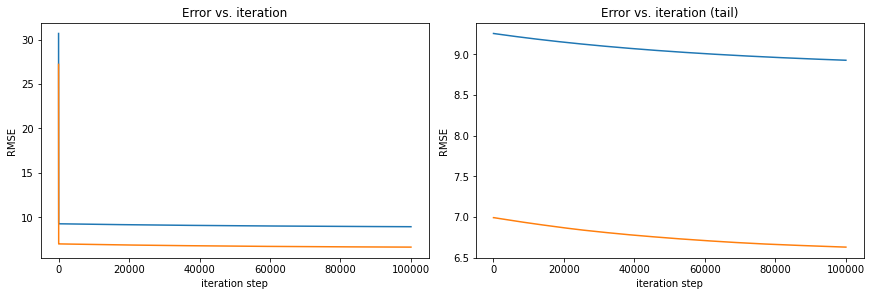

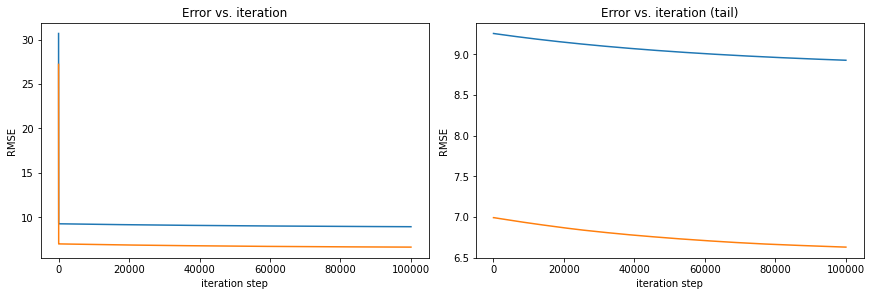

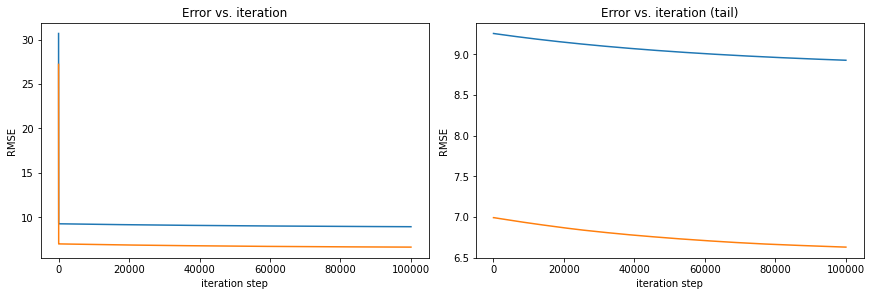

In [111]:
theta = PlotRidge(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs , Xtest_5_1 , ytest_5_1)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_2 , ytest_5_2)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_3 , ytest_5_3)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_4 , ytest_5_4)
theta = PlotRidge(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs, Xtest_5_5 , ytest_5_5)


#### (d) Implement the normal equation (closed form) for linear regression

In [112]:
def Normal(X, Y, learning_rate, epochs):
    
    theta = np.ones((X.shape[1], 1)) 

    theta = ( np.linalg.inv((X.T.dot(X))) ).dot(X.T).dot(Y)   ## Implemented the Normal equation

    return theta

def check_error(X_test , Y_test , theta):
    
    y_pred = np.dot(X_test, theta)

    print("RMSE Error (validation loss) is ")
    print((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)
    return ((np.sum(((abs(Y_test - y_pred))**2))/Y_test.shape[0])**0.5)

error_5_1=0

# W = (XT.X)^-1.XT.Y
# Where W is our Theta. 


# Here we have used the Normal equation to find the value of theta and used it to find the predicted values.



In [113]:
theta = Normal(Xtrain_5_1, ytrain_5_1,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_1 , ytest_5_1 ,  theta)

RMSE Error (validation loss) is 
7.787734153468953


In [114]:
theta = Normal(Xtrain_5_2, ytrain_5_2,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_2 , ytest_5_2 ,  theta)

RMSE Error (validation loss) is 
11.67918817407055


In [115]:
theta = Normal(Xtrain_5_3, ytrain_5_3,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_3 , ytest_5_3 ,  theta)

RMSE Error (validation loss) is 
7.628155508171655


In [116]:
theta = Normal(Xtrain_5_4, ytrain_5_4,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_4 , ytest_5_4 ,  theta)

RMSE Error (validation loss) is 
9.428225030142785


In [117]:
theta = Normal(Xtrain_5_5, ytrain_5_5,  learning_rate, epochs)
error_5_1 = error_5_1 +check_error(Xtest_5_5 , ytest_5_5 ,  theta)

RMSE Error (validation loss) is 
7.2114321750311055


In [118]:
print("The MEAN RMSE error for Normal Equation for K = 5 is "+str(error_5_1/5)+"%")

The MEAN RMSE error for Normal Equation for K = 5 is 8.74694700817701%
